# SIMULATION OF NLOS-VLC SYSTEM USING THE ROLLING SHUTTER MECHANISM

Import the transmitter, surface and camera objects, as well as numpy library.

In [1]:
#Import module Transmitter
from transmitter import Transmitter as Transmitter

from surface import Surface as Surface

from camera import Camera as Camera

import numpy as np


The trasmitter is defined as a Trasmitter type object from eight input parameters

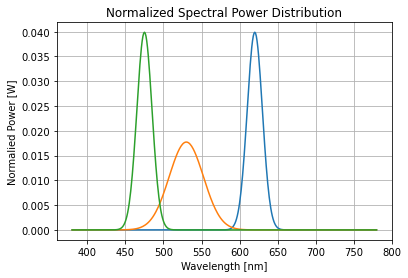

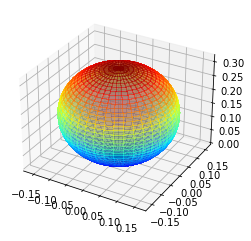

In [2]:
transmitter = Transmitter(
        "Led1",
        position=[3, 4, 8],
        normal=[0, 0, -1],
        mlambert=1,
        wavelengths=[620, 530, 475],
        fwhm=[20, 45, 20],
        modulation='ieee16',
        luminous_flux=5000
    )
transmitter.plot_spd_normalized()
transmitter.plot_led_pattern()

The surface is defined from eight imputs parametes

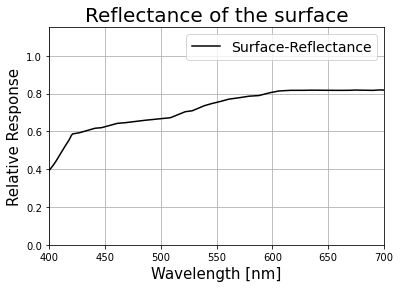

In [3]:
surface = Surface(
    name="surfacePlaster",
    position=[0, 0, 1],
    reflectance='plaster',
    vertex1=[1.0, 2.0, 0.0],
    vertex2=[5.0, 2.0, 0.0],
    vertex3=[5.0, 6.0, 4.0],
    vertex4=[1.0, 6.0, 4.0]
    )
surface.plot_reflectance()
surface._group_vertices()


The camera is defined from a set of 13 input parameters

In [5]:
MX = 1e2  # number of pixels per unit distance in image coordinates in x direction
MY = 1e2  # number of pixels per unit distance in image coordinates in y direction
FOCAL_LENGTH = 3/MX  # focal length
PX= 3/MX  # principal point x-coordinate
PY= 2/MY  # principal point y-coordinate
THETA_X = np.pi / 2.0  # roll angle
THETA_Y = np.pi  # pitch angle
THETA_Z = np.pi  # yaw angle
C = np.array([3, -5, 2])  # camera centre
IMAGE_HEIGTH = 4
IMAGE_WIDTH = 6

camera = Camera(
    name="camera1",
    focal_length=FOCAL_LENGTH,
    px=PX,
    py=PY,
    mx=MX,
    my=MY,
    theta_x=THETA_X,
    theta_y=THETA_Y,
    theta_z=THETA_Z,
    centre=C,
    image_height=IMAGE_HEIGTH,
    image_width=IMAGE_WIDTH,    
    surface=surface,
    transmitter=transmitter,
    sensor='SonyStarvisBSI'
)

NameError: name 'surface3' is not defined